In [3]:
import constrained as cd
from constrained.constraints import inset, aligned_vertically, distributed_vertically, aligned_horizontally, distributed_horizontally

In [5]:
def exception_box(title: str, examples: list[str], checked: bool):
    box = cd.Rect(style=cd.Style(fill=None, outline=(0, 0, 0)))
    title = cd.Text(title, style = cd.Style(fill=(0, 0, 0)))
    if checked:
        subtitle = cd.Text("Checked", style = cd.Style(fill=(0, 0, 0)))
    else:
        subtitle = cd.Text("Unchecked", style = cd.Style(fill=(0, 0, 0)))
    text_content = cd.Group([title, subtitle], [distributed_vertically([title, subtitle], spacing=5), aligned_vertically([title, subtitle])])
    examples = [cd.Text(e, style=cd.Style(fill=(0, 0, 0))) for e in examples]

    return cd.Group([box, text_content] + examples, [
        inset(text_content, box, 5, 5),
        distributed_vertically([box] + examples, spacing=5),
        aligned_vertically([box] + examples, align="left")
    ])

Solved 359 constraints in 0.024s


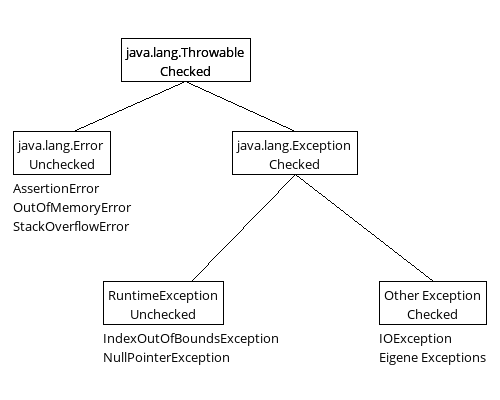

In [8]:
width = 500
height = 400
between_layers = 50
mid_spacing = 100
bottom_spacing = 100

bg = cd.Rect(top_left = cd.point((0, 0)), width=width, height=height, style=cd.Style(fill=(255, 255, 255), outline=None))
throwable = exception_box("java.lang.Throwable", [], True)
error = exception_box("java.lang.Error", ["AssertionError", "OutOfMemoryError", "StackOverflowError"], False)
exception = exception_box("java.lang.Exception", [], True)
runtime_ex = exception_box("RuntimeException", ["IndexOutOfBoundsException", "NullPointerException"], False)
custom_ex = exception_box("Other Exception", ["IOException", "Eigene Exceptions"], True)

mid_layer = cd.Group([error, exception], [distributed_horizontally([error, exception], mid_spacing), aligned_horizontally([error, exception], align="top")])
bottom_layer = cd.Group([runtime_ex, custom_ex], [distributed_horizontally([runtime_ex, custom_ex], bottom_spacing), aligned_horizontally([runtime_ex, custom_ex], align="top")])

throwable_error = cd.Arrow(start=throwable.bounds.bottom_edge.at(0.5), end=error.bounds.top_edge.at(0.5), style=cd.Style(fill=(0, 0, 0)))
throwable_ex = cd.Arrow(start=throwable.bounds.bottom_edge.at(0.5), end=exception.bounds.top_edge.at(0.5), style=cd.Style(fill=(0, 0, 0)))
throwable_ex = cd.Arrow(start=throwable.bounds.bottom_edge.at(0.5), end=exception.bounds.top_edge.at(0.5), style=cd.Style(fill=(0, 0, 0)))
ex_runtime = cd.Arrow(start=exception.bounds.bottom_edge.at(0.5), end=runtime_ex.bounds.top_edge.at(0.5), style=cd.Style(fill=(0, 0, 0)))
ex_custom = cd.Arrow(start=exception.bounds.bottom_edge.at(0.5), end=custom_ex.bounds.top_edge.at(0.5), style=cd.Style(fill=(0, 0, 0)))

content = cd.Group([throwable, mid_layer, bottom_layer, throwable_error, throwable_ex, ex_runtime, ex_custom], [
    distributed_vertically([throwable, mid_layer, bottom_layer], spacing=between_layers),
    throwable.bounds.center.x == mid_layer.bounds.center.x,
    exception.bounds.center.x == bottom_layer.bounds.center.x
])

root = cd.Group([bg, throwable, content], [
    bg.bounds.center == content.bounds.center,
])
canvas = cd.Canvas(width, height, root)
canvas.show()